<div style="text-align: center; font-size: 30px;">
    <h1>MODELO PREDICTIVO</h1>
</div>


In [111]:
# Importaciones
import pandas as pd  # para leer el csv y hacer un dataframe
import numpy as np # para crear los arrays
import matplotlib.pyplot as plt # para graficar
import seaborn as sns # para graficar
sns.set()
import datetime as dt # para revisar fechas
from sklearn import linear_model # importamos los modelos de Regresion Lineal
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate # Importamos herramientas basicas para el modelo
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report # Importamos metricas
from sklearn import preprocessing # Para estandalizar nuestos datos
from sklearn.ensemble import RandomForestRegressor # importamos el modelo Random Forest
#import optuna as opt / Para optimizar parametros
import xgboost as xgb # Importamos el modelo de XGBoost
import random # Para establecer numeros aleatorios
from sklearn.tree import DecisionTreeClassifier # Importamos los modelos clasificadores
from sklearn.neighbors import KNeighborsClassifier # Importamos los modelos clasificadores

In [112]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()

In [113]:
df_cars = pd.read_csv('../data/ML_cars.csv') # leemos nuestros datos

In [114]:
columnas = [
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']
# Definimos las columnas a utilizar y creamos el DataFrame
df_cars = df_cars[columnas]

In [115]:
df_cars[df_cars.index == random.randint(0,len(df_cars)+1)] # Escogemos un valor aleatorio

,enginesize,horsepower,citympg,highwaympg,price
36,92,76,30,34,7295.0


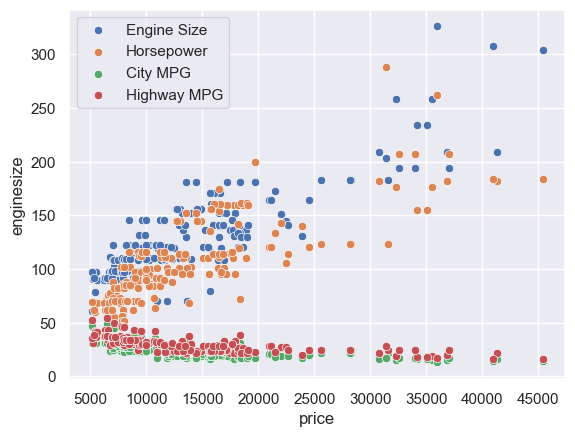

In [116]:
sns.scatterplot(data=df_cars, x='price', y='enginesize', label='Engine Size')
sns.scatterplot(data=df_cars, x='price', y='horsepower', label='Horsepower')
sns.scatterplot(data=df_cars, x='price', y='citympg', label='City MPG')
sns.scatterplot(data=df_cars, x='price', y='highwaympg', label='Highway MPG')

# Show the plot
plt.show() #Visualizamos nuestros datos a grandes rasgos

Tenemos una distribucion bastante dispareja

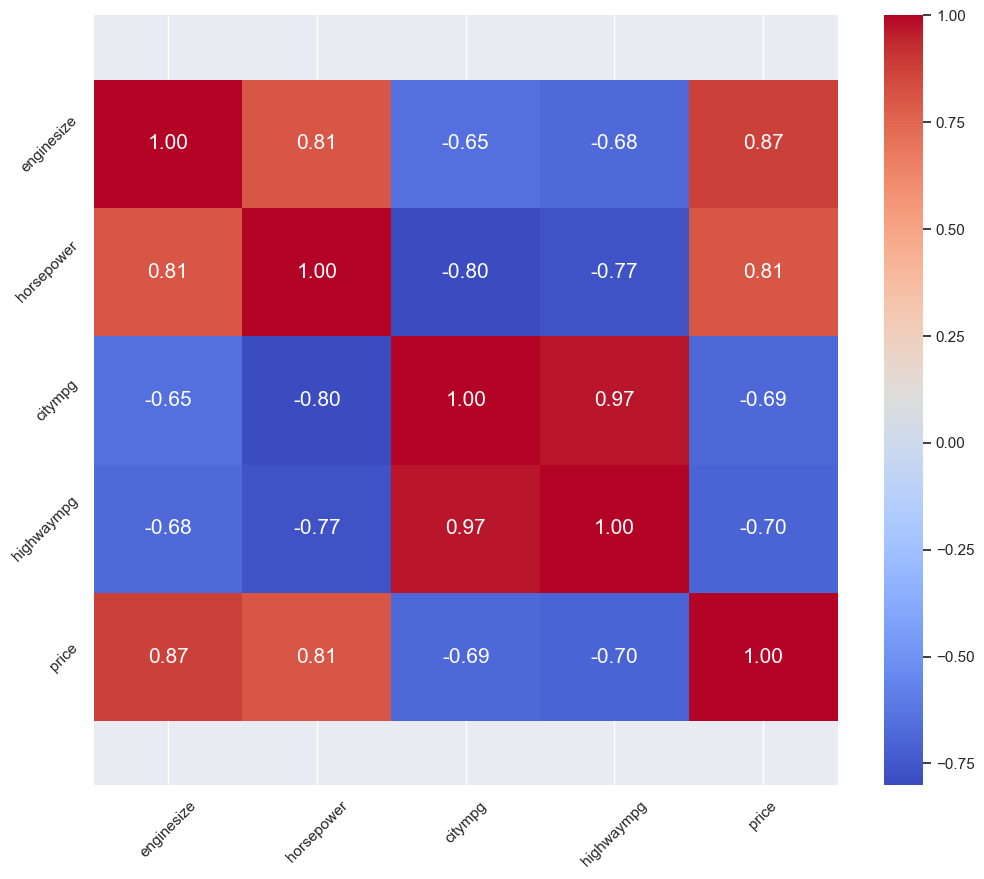

In [117]:
corr = df_cars.corr()
plot_corre_heatmap(corr) # Analizamos nuestras columnas y nos quedamos con las que afecten mas al precio

Vamos a mantener todas estas columnas ya que afectan bastante a nuestro precio


In [118]:
X = df_cars[columnas]
X = X.drop('price', axis=1)
y = df_cars['price']
y = np.array(y).reshape(-1,1)

# Creamos la variable "X" que contiene nuestos datos predictores
# Y la variable "y" que contiene nuestro precio a predecir

In [119]:
scaler_x = preprocessing.StandardScaler() # Instanciamos un Scaler para "X" 
scaler_y = preprocessing.StandardScaler() # Instanciamos un Scaler para "y" 
X = scaler_x.fit_transform(X) # Transformamos nuestros datos "X"
y = scaler_y.fit_transform(y) # Transformamos nuestros datos "y"

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Separamos nuestros
                                                                                         # datos, dejando un 20%
                                                                                         # para testear

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(164, 4) (164, 1) (41, 4) (41, 1)


In [121]:
# Creamos modelos de prueba (4)

modelo_lineal = linear_model.LinearRegression() # Modelo de regresion lineal
modelo_ridge = linear_model.Ridge(alpha=.5) # Modelo de regresion Ridge
modelo_boost = xgb.XGBModel() # Modelo de XGBoost
modelo_rf = RandomForestRegressor(n_estimators = 50, random_state=18) # Modelo de Random Forest

# Entrenar los modelos con los datos de entrenamiento
modelo_lineal.fit(X_train, y_train)
modelo_ridge.fit(X_train, y_train)
modelo_boost.fit(X_train, y_train, verbose=False)
modelo_rf.fit(X_train, y_train)

# Realizar las predicciones en los datos de prueba
y_pred_lineal = modelo_lineal.predict(X_test)
y_pred_ridge = modelo_ridge.predict(X_test)
y_pred_boost = modelo_boost.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)

# Obtenemos los rendimientos

r2_lineal = r2_score(y_test, y_pred_lineal)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_boost = r2_score(y_test, y_pred_boost)
r2_rf = r2_score(y_test, y_pred_rf)

print("Score Lineal: ", r2_lineal)
print("Score Ridge: ", r2_ridge)
print("Score XGBoost: ", r2_boost)
print("Score RandomForest: ", r2_rf)

Score Lineal:  0.8029265438106066
Score Ridge:  0.8026686368815231
Score XGBoost:  0.914189832616109
Score RandomForest:  0.9042217465700764


e:\Program Files\Python 3.11\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


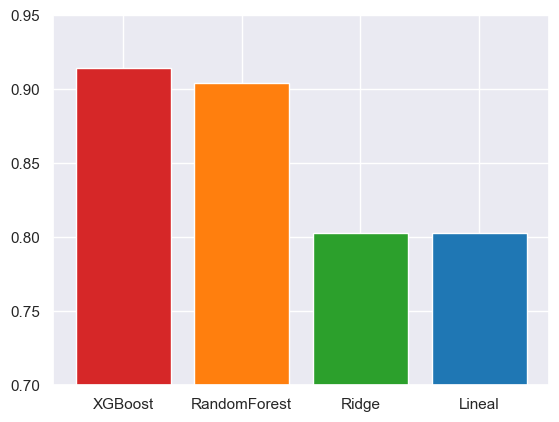

In [122]:
# Graficamos los modelos con sus respectivos rendimientos

bar_labels = ['red', 'orange', 'green', 'blue']
bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
labels = ['XGBoost','RandomForest','Ridge', 'Lineal']
calcs = [r2_boost,r2_rf,r2_ridge,r2_lineal]
fig, ax = plt.subplots()
ax.bar(labels , calcs, label=bar_labels, color=bar_colors)
plt.ylim(0.7, 0.95)
plt.show()

<p>Vemos que los modelos XGBoost y RandomForest son muy superiores a los demas.</p>
<p>Pero por un poco es mas optimo utilizar XGBoost asi que ese utilizaremos</p>

<h3>Escogemos el mejor modelo a utilizar (XGBoost)</h3>

In [123]:
model= modelo_boost

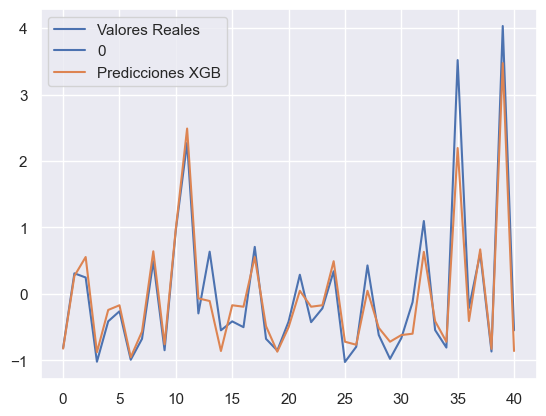

In [124]:
# Analizamos las predicciones

sns.lineplot(y_test, label='Valores Reales')
sns.lineplot(y_pred_boost, label='Predicciones XGB')
plt.show()

<div style="text-align: center; color:red">
    <h2>Ejemplo de prediccion</h2>
</div>

In [125]:
df_cars[df_cars.index == 180] # Vehiculo 180 (aleatorio)

,enginesize,horsepower,citympg,highwaympg,price
180,171,156,20,24,15690.0


In [126]:
# Creamos una funcion que nos retorna el precio predicho

def precio_auto(enginesize, horsepower, citympg, highwaympg) -> float:
    datos_del_vehiculo = np.array([enginesize, horsepower, citympg, highwaympg]).reshape(1,-1)
    predictor = scaler_x.transform(datos_del_vehiculo)
    prediccion = model.predict(predictor).reshape(1,-1)
    result = scaler_y.inverse_transform(prediccion)
    return f'{round(int(result[0][0]), 2)}$'

In [127]:
precio_auto(171, 156, 29, 24) # Datos del vehiculo 180

e:\Program Files\Python 3.11\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'16858$'

<p>Precio real: 15690.0</p>
<p>Precio predicho: 16858.0</p>
<p>Precision manual = 15690.0 / 16858.0 = 0.93 ~</p>

<div style="text-align: center; font-size: 30px;">
    <h1>MODELO CLASIFICADOR</h1>
</div>


In [128]:
# Creamos una columna 'Category' basada en la mediana de el Dataset
# 1 para caros
# 0 para baratos

df_cars['category'] = df_cars['price'].apply(lambda price: 0 if price <= df_cars.price.median() else 1)

In [129]:
cheap = df_cars[df_cars['category'] == 0] # Cantidad de automoviles baratos
expensive = df_cars[df_cars['category'] == 1] # Cantidad de automoviles caros
print(f'Caros: {len(expensive)}\nBaratos: {len(cheap)}') # Vemos que tenemos una distribucion buena.

Caros: 102
Baratos: 103


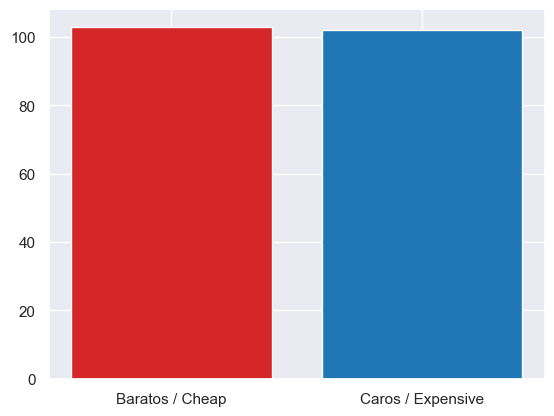

In [130]:
# Graficamos

bar_labels = ['red','blue']
bar_colors = ['tab:red','tab:blue']
labels = ['Baratos / Cheap','Caros / Expensive']
calcs = [len(cheap),len(expensive)]
fig, ax = plt.subplots()
ax.bar(labels , calcs, label=bar_labels, color=bar_colors)
#plt.ylim(0.7, 0.95)
plt.show()

Tenemos una buena distribucion de datos.
No hara falta hacer un reescaleo. (Oversampling, Undersampling)

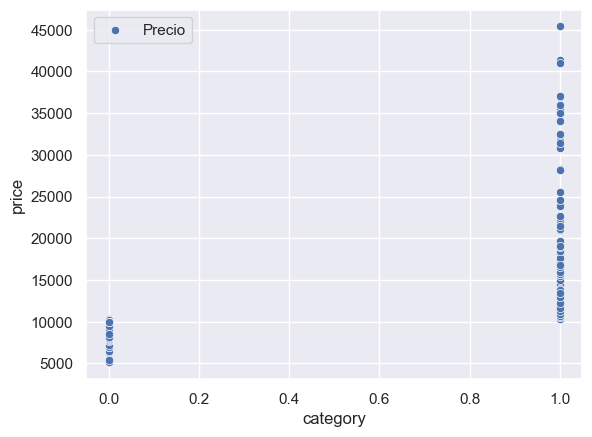

In [131]:
# Graficamos la distribucion de la categoria del dataset

sns.scatterplot(data=df_cars, x='category', y='price', label='Precio')

# Show the plot
plt.show()

Vemos que el rango de precios es bastante distante.

<Axes: >

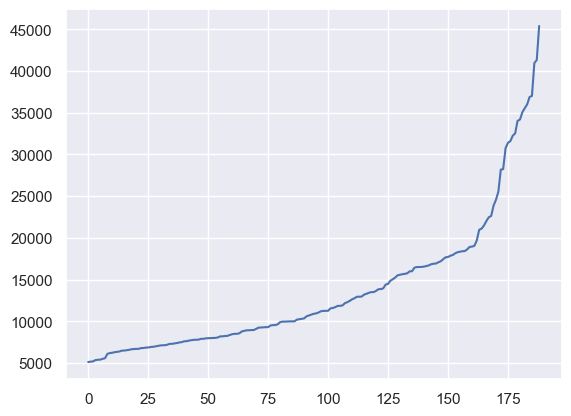

In [132]:
# Graficamos nuestos precios unicos

unique_prices = df_cars.sort_values(by='price')['price'].unique()
sns.lineplot(unique_prices)

Tenemos una tendencia alcista con respecto a la relacion entre la cantidad de precios y el valor de ellos

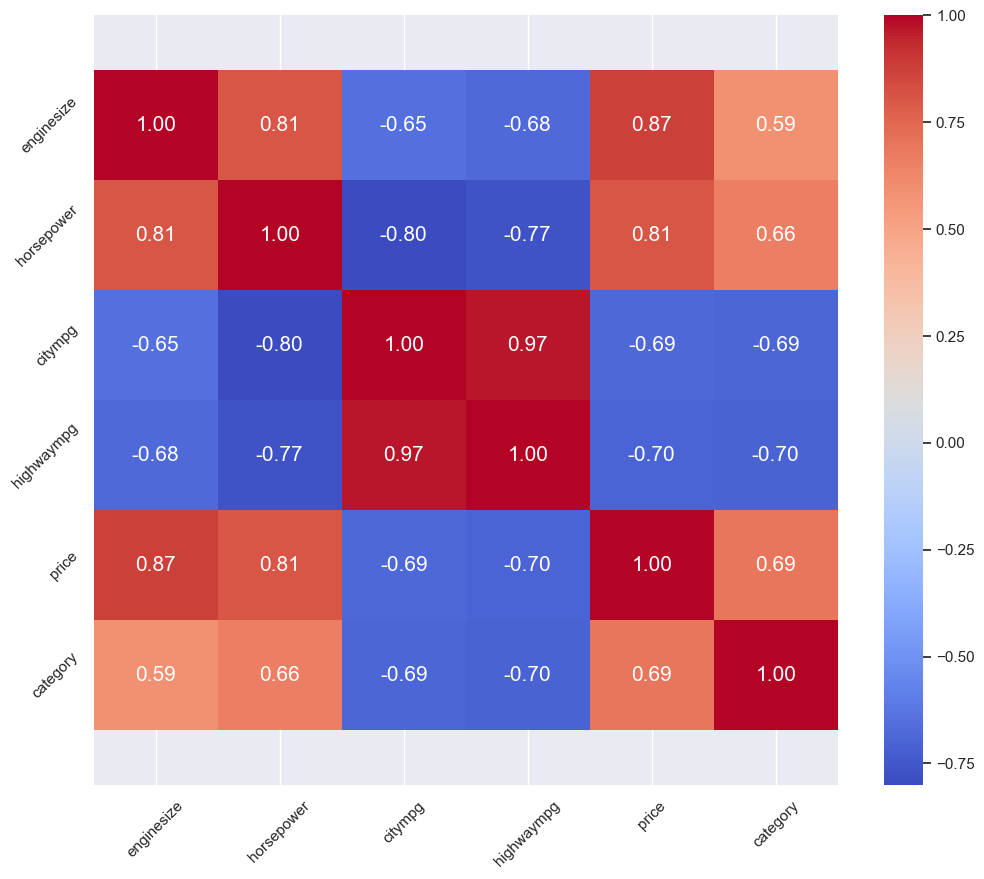

In [133]:
# Graficamos la matriz de correlacion

corr = df_cars.corr()
plot_corre_heatmap(corr)

Vemos que las variables afectan lo suficiente a la categoria asi que las mantenemos


In [134]:
# Establecemos nuestras variables X e y

X = df_cars[['enginesize', 'horsepower', 'citympg', 'highwaympg', 'price']]
y = df_cars['category']

In [135]:
# Estandarizamos nuestros datos

scaler_x = preprocessing.StandardScaler()
X = scaler_x.fit_transform(X)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Separamos nuestros
                                                                                           #datos, dejando un 20%
                                                                                           #para testear

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(164, 5) (164,) (41, 5) (41,)


In [137]:
tree = DecisionTreeClassifier(max_depth=None) # Creamos un modelo de arbol de regresion
tree.fit(X_train, y_train) # Lo entrenamos
y_test_pred = tree.predict(X_test) # Predecimos en el test
y_train_pred = tree.predict(X_train) # Predecimos en el train
matrix = confusion_matrix(y_test, y_test_pred) # Creamos la matriz de confusion
score = accuracy_score(y_test,y_test_pred) # Obtenemos nuestro score

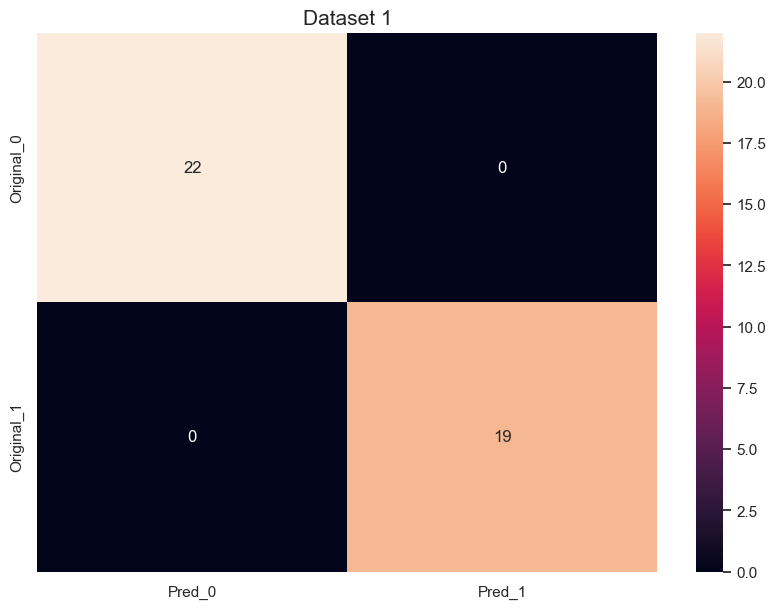

In [138]:
# Representamos nuestra matriz de confusion

df_matrix = pd.DataFrame(matrix, index = [i for i in ['Original_0','Original_1']], columns = [i for i in ['Pred_0','Pred_1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_matrix, annot=True, fmt="d")
plt.title('Dataset 1', fontsize = 15)
plt.show()

<div style="text-align: center; color:red">
    <h2>Ejemplo de prediccion</h2>
</div>

In [139]:
# Creamos una funcion que predice utilizando el modelo

def car_category(enginesize,horsepower,citympg,highwaympg, price) -> str:
    datos_del_vehiculo = [enginesize,horsepower,citympg,highwaympg, price]
    predictor = np.array(datos_del_vehiculo).reshape(1,-1)
    predictor = scaler_x.transform(predictor)
    prediccion = tree.predict(predictor)
    if prediccion == 0:
        return 'Cheap'
    else:
        return 'Expensive'

In [140]:
print(df_cars['price'].median())
print(car_category(350,500,20,27,9000))
print(car_category(200,158,30,38,15000))

10295.0
Cheap
Expensive


e:\Program Files\Python 3.11\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Program Files\Python 3.11\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<div style="text-align: center; color:green">
    <h1>FIN</h1>
</div>
